# Machine Learning Assignment

Machine learning is a method to create a computer model that can make predictions on data by matching historical data to historical results. A seperate set of historical predictors and targets can then be tested to see how accurate the the model results compare to the second set of targets. 

In this assignment these two sets of data will be called `_train` and `_test`. The `_train` data will be used to train the model for prediction and the `_test` data will be used to prove the accuracy of the model. The prediction data is `X` and the target is `y`.

The two models looked at will be the Linear Model and the Deep Neural Network model. The linear model looks at the data and tries to fit a linear relationship between the data and results. The neural network will generate a series of nodes to create a function that will return the correct solution based on biasing the layers of nodes.

## Linear Model

The linear regression model is a model that looks at data and looks for a correlation between the predictors and the target and tried to best fit a line. 

A simple example might be in Scotland as summer progresses to winter the temperature begins to drop. The temperature will generally drop, it won't be exactly linear and some days might be warmer than others but over all a drop in temerature with the lead up to winter will happen. This will come across as a negative correlation, where as a positive correlation will be the temperature rising as winter progresses back to summer. The model created is similar to the math equation `y = mX + c`.

From that simple model based on date and temperature one can make predictions and preperations like storing food or getting warmer insulation for winter.

In this assignment instead of the temperature being the target, based on date, the number of collisions in New York is the target, and the predictions will be made based on the weekday `weekday_num`, temperature `temp`, sea level pressure `slp`, and wind speed `wdsp`.

The data being used is based on the data that was cleaned in [assignment 1](https://github.com/20023167uhi/DataAnalytics/blob/main/Python/Data%20Analytics%20on%20the%20Web/Assignment%201/DataAnalyticsOnTheWebAssignment.ipynb). The data is imported from the git repository and checked with the `.info()` function and the `.head()` function just to make sure  it has imported correctly.

In [ ]:
# needed to create the data frame
import pandas as pd

# create data frame from csv file we hosted on our github
df_linear = pd.read_csv('https://raw.githubusercontent.com/20023167uhi/DataAnalytics/main/Python/Data%20Analytics%20on%20the%20Web/Assignment%201/Data/Tom_Blackwood-Linear-Weather_and_Collision_data_for_New_York_boroughs_2012-2020.csv', index_col=0, )

# Make sure we have our data by printing the head of it out
df_linear.head(6)

,weekday_num,temp,slp,wdsp,collisions
date,,,,,
2013-01-01,2,38.0,1008.8,15.0,0.097222
2013-01-02,3,27.5,1013.4,12.4,0.498747
2013-01-03,4,21.8,1018.1,9.8,0.527430
2013-01-04,5,32.2,1015.2,11.3,0.645503
2013-01-05,6,37.3,1017.3,13.2,0.095238
2013-01-06,0,35.7,1019.7,5.9,0.118056


In [ ]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 2013-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  2555 non-null   int64  
 1   temp         2555 non-null   float64
 2   slp          2555 non-null   float64
 3   wdsp         2555 non-null   float64
 4   collisions   2555 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 119.8+ KB


Next to prepare the data for the machine learning, the dataset is split between the predictors `X` and targets `y` and split into model training `X_train` and `y_train` and model testing sets `X_test` and `y_test`.

The library Science-Kit Learn, `sklearn` has a `model_selection` library where `train_test_split` can be imported to split the data between a training set and a testing set.

What it does is randomly shuffle both datasets, keeping the predictors and target rows matched in the shuffle, and selects the test size based on the value inputted in `test_size`. The shuffled random state can be seeded using `random_state`.

In [ ]:
# needed to help with speedy maths based calculations
import numpy as np
from sklearn.model_selection import train_test_split

X = df_linear.iloc[:, :-1]
y = df_linear.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

The predictor dataset for `_train` and `_test` looks like:

In [ ]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 2017-10-30 to 2015-05-14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  2044 non-null   int64  
 1   temp         2044 non-null   float64
 2   slp          2044 non-null   float64
 3   wdsp         2044 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 79.8+ KB


,weekday_num,temp,slp,wdsp
date,,,,
2017-10-30,1,60.4,997.1,27.3
2015-06-30,2,67.1,1015.7,7.1
2018-04-12,4,42.8,1019.4,9.8
2015-07-12,0,71.5,1016.1,9.3
2018-03-16,5,36.1,1000.1,13.5


In [ ]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 2019-10-27 to 2013-08-17
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  511 non-null    int64  
 1   temp         511 non-null    float64
 2   slp          511 non-null    float64
 3   wdsp         511 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 20.0+ KB


,weekday_num,temp,slp,wdsp
date,,,,
2019-10-27,0,53.4,1022.7,14.3
2018-01-08,1,35.0,1023.6,18.3
2018-10-28,0,56.8,1007.4,13.4
2017-04-23,0,46.5,1017.3,10.5
2018-11-22,4,24.9,1022.1,19.2


And the target `_train` and `_test` datasets look like:

In [ ]:

print(f"""Train:
{y_train.head()}

Length: {len(y_train)}""")

Train:
date
2017-10-30    0.445346
2015-06-30    0.508846
2018-04-12    0.516092
2015-07-12    0.209363
2018-03-16    0.440729
Name: collisions, dtype: float64

Length: 2044


In [ ]:

print(f"""Test:
{y_test.head()}

Length: Length: {len(y_test)}""")

Test:
date
2019-10-27    0.185617
2018-01-08    0.583673
2018-10-28    0.188135
2017-04-23    0.201825
2018-11-22    0.046875
Name: collisions, dtype: float64

Length: Length: 511


In [ ]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_TRIPS = 1.0

The data is now seperated and ready to be processed.

The library being used to create the model is `TensorFlow`.

In [ ]:
# import tensorflow
%tensorflow_version 1.x
import tensorflow as tf

# check the version
print(tf.__version__)

# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

TensorFlow 1.x selected.
1.15.2


The `shutil` library is imported to work with high-level file operations. It is used to remove and delete the temporary folder any previous linear regressor models run have been saved to.

In [ ]:
# needed for high-level file management
import shutil  

# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/linear_regression_trained_model', ignore_errors=True)

The parameters of the TensorFlow model are set up before running the 'fitting' to create the model. The directory is set using `model_directory` to store the model in `/tmp/linear_regression_trained_model`. The optimizing algartithm is set to Adam which is developed from the stochastic gradient descent. This optimizer has been more broadly adapted for deep learning applications in computer vision and natural language processing. The model infers real values from the input columns and interprets them as dense fixed length floating values. 

In [ ]:
# See the link for more information
# https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/contrib/learn/LinearRegressor
estimator_linear = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.1), 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
      )
  )

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:


The model is ready to be fitted with the training `_train` data. The `.fit()` command is used to do this, and train the model with a set number of `steps`, in this case `10,000`.

In [ ]:
# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
estimator_linear.fit(X_train, y_train/SCALE_NUM_TRIPS, steps=10000)

starting to train
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/linear_regression_trained_model/model.ckpt.
INFO:tensorflow:loss = 0.23960131, step = 1
INFO:tensorflow:global_step/sec: 373.26
INFO:tensorflow:loss = 0.33918944, step = 101 (0.270 sec)
INFO:tensorflow:global_step/sec: 408.349
INFO:tensorflow:loss = 0.050391547, step = 201 (0.245 sec)
INF

SKCompat()

The predictor data is obtained from the fitted model using the `X_test` data in the `.predict()` function of the model just created. The prediciton data is then converted into a dataframe to look at the `score` of `preds_linear`.

In [ ]:
# Next, we can check our predictions based on our predictors.
preds_linear = estimator_linear.predict(x=X_test)
preds2_linear = pd.DataFrame.from_dict(data=preds_linear)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


There are three metrics with which the accuracy can be calculated with, the *Mean Absolute Error*, *Mean Squared Error*, and the *Root Mean Squared Error*. These functions return an idea of how well the model has performed in predicting what the result should be. An average value close to 0 means the model is very accurate where as larger values imply the model is very inaccurate.

The mean absolute error (*MAE*) is the absolute of the errors. It is calculated by it is the sum of the modulus of the target test value minus the predicted value, and then divided by the number of values.
\begin{equation} MAE = \frac {1}{n} \sum^{n}_{i=1} |y_i-\hat{y}_i|  \end{equation}

The mean squared error (*MSE*) looks at the the sum of the target test value minus the predicted value squared, and divided by the number of values.
\begin{equation} MSE = \frac {1}{n} \sum^{n}_{i=1} (y_i-\hat{y}_i)^2  \end{equation}

The root mean squared error (*RMSE*) is the same as the mean average error but the square root is taken after averaging the data. The purpose of this is to put a heavier penalty on errors made by the model.
\begin{equation} RMSE = \sqrt {\frac {1}{n} \sum^{n}_{i=1} (y_i-\hat{y}_i)^2}  \end{equation}

As can be seen if the predicted values are close to the actual values, the subtraction of one from the other will give a result close to zero.

The calculated out mean absolute error, mean squared error, and root mean squared error are calculated using the `metrics` library in `sklearn` and the square root function from `numpy`, `np.sqrt`. The data used is the prediction data and the target `y_test` data.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds2_linear))
print('MSE:', metrics.mean_squared_error(y_test, preds2_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds2_linear)))

MAE: 0.6937660589361618
MSE: 0.5353002910861401
RMSE: 0.7316421878802097


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Plots can be used to visualize how accurate the models are. Using a regression plot the scores can be compared to the prediction data to see how they compare and how a best fitting line can be drawn with respect to the scattered data around it.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


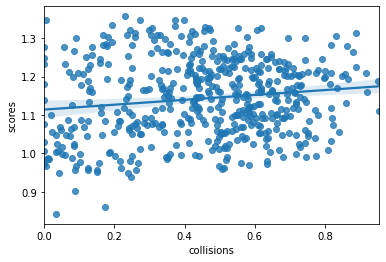

In [ ]:
sns.regplot(y_test, preds2_linear)

And a distribution plot of the target test data minus the predicted data gives an idea of the accuracy of the model. A negative value imples the model tends to over compensate and predict more collisions than what were.

Hence the linear regression model is not very accurate for this purpose.

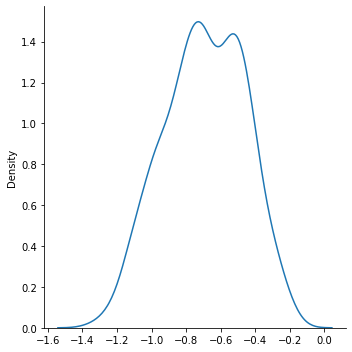

In [ ]:
sns.displot(y_test.reset_index(drop=True) - preds2_linear.scores, kind='kde');

Next some random data can be made up to also fed into the model. Three Mondays (`weekday_num = 1`) can be fed into the linear model. 

In [ ]:
input = pd.DataFrame.from_dict(data = {
    'weekday_num' : [1,1,1],
    'temp' : [61.8, 31.2, 77.0],
    'slp' : [1023, 1002, 985],
    'wdsp' : [5.0, 3.0, 8.0]
  })					

estimator_linear = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)
    )
  )

preds_test_linear = estimator_linear.predict(x=input.values)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0da906358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ck

The the maximum number of collisions in a worst case scenario for all boroughs tends is about 700. If the prediction data, which was previously normalized, is multiplied by this value then the linear model is found to over predict to have one hand a half times as many collisions as what the target is.

In [ ]:
# The average number of collisions scale value is 700 when at a maximum, based on the analysis from Assignment 1
predslistnorm_linear = preds_test_linear['scores']
predslistscale_linear = preds_test_linear['scores']*700
prednorm_linear = format(str(predslistnorm_linear))
preds_res_linear = format(str(predslistscale_linear))
print(prednorm_linear)
print(preds_res_linear)

[1.1153883 1.0094155 1.1174734]
[780.7718 706.5909 782.2314]


From test inputs the first element in the array here is similar to this actual data:

529 collisions on a Monday where the temperature is approximately 61.8F, sea level pressure of 1023 millibars and a windspeed of 5 knots.

Similarly with the second entry, approximately 479 collisions are predicted on a monday where there's a drop in sea level pressure to 1002 millibars, lower temperature of 31.2F and a windspeed of 3 knots.

And with the third seems to have the same score as the first. 530 collisions would be predicted on a Monday with a high temperature of 77F and a windspeed of 8 knots but a large drop in sea level pressure to 985 millibars doesn't seem to have an affect on the result. 

The day is changed to a Friday (`weekday_num = 5`) and the same values are run to see the affect of week day on the data.

In [ ]:
input_linear = pd.DataFrame.from_dict(data = {
    'weekday_num' : [5,5,5],
    'temp' : [61.8, 31.2, 77.0],
    'slp' : [1023, 1002, 985],
    'wdsp' : [5.0, 3.0, 8.0]
  })		

estimator_linear = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input_linear.values)
    )
  )

preds_test_linear = estimator_linear.predict(x=input_linear.values)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0da8d44a8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ck

In [ ]:
predslistnorm_linear = preds_test_linear['scores']
predslistscale_linear = preds_test_linear['scores']*510
prednorm_linear = format(str(predslistnorm_linear))
preds_res_linear = format(str(predslistscale_linear))
print(prednorm_linear)
print(preds_res_linear)

[1.2874129 1.1814401 1.289498 ]
[656.58057 602.5345  657.644  ]


This test uses day 5 (Friday) instead of day 1 (Monday) which shows higher collisions where the other values were left the same. With respect to what can be seen in the plots by weekdays, in general there tends to be more collisions on a Friday than on a Monday.

In Assignment 1, sea level pressure was found to a negative correlation and setting the sea level pressure to a low value does reflect this as the collisions increased a little.

## Deep-learning Neural Networks (DNN)

The method for processing for preparing and entering the data for the DNN is similar to the linear regression model above. The data will be imported from the git repository, checked to see if it's the correct dataset and that it's the right shape and ready to be processed.

The data will be split into `_train` and `_test` sets again and the predictors will be set as `X` and the targets set as `y`.

One difference between the DNN data and the linear regression data is before there was a column for `weekday_num` which hosted the week day number, where Sunday was 0 and Saturday was 6. Instead of that One Hot Encoding (OHE) was used to encode the months and the week days into a binary format.

The issue with using an integer for the month is that every month is equal and using an integer would weight the data in the calculation. So December being month 12 will have more weight to it than every other month.


In [ ]:
# create data frame from csv file we hosted on our github
df_dnn = pd.read_csv('https://raw.githubusercontent.com/20023167uhi/DataAnalytics/main/Python/Data%20Analytics%20on%20the%20Web/Assignment%201/Data/Tom_Blackwood-OHE-Weather_and_Collision_data_for_New_York_boroughs_2012-2020.csv', index_col=0)
df_dnn.head(6)

,temp,slp,wdsp,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,collisions
date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,38.0,1008.8,15.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.097222
2013-01-02,27.5,1013.4,12.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.498747
2013-01-03,21.8,1018.1,9.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.527430
2013-01-04,32.2,1015.2,11.3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.645503
2013-01-05,37.3,1017.3,13.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.095238
2013-01-06,35.7,1019.7,5.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.118056


In [ ]:
# make sure we have our data by printing it out
df_dnn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 2013-01-01 to 2019-12-31
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        2555 non-null   float64
 1   slp         2555 non-null   float64
 2   wdsp        2555 non-null   float64
 3   April       2555 non-null   int64  
 4   August      2555 non-null   int64  
 5   December    2555 non-null   int64  
 6   February    2555 non-null   int64  
 7   January     2555 non-null   int64  
 8   July        2555 non-null   int64  
 9   June        2555 non-null   int64  
 10  March       2555 non-null   int64  
 11  May         2555 non-null   int64  
 12  November    2555 non-null   int64  
 13  October     2555 non-null   int64  
 14  September   2555 non-null   int64  
 15  Friday      2555 non-null   int64  
 16  Monday      2555 non-null   int64  
 17  Saturday    2555 non-null   int64  
 18  Sunday      2555 non-null   int64  
 19  Thursday    2555 

The collison data column is set to the target `y` value, dropped from the predictor columns for the `X` component and then the data was split into `_train` and `_test` values.

In [ ]:
# The data is split between the target 'y' and the predictors 'X'
y = df_dnn['collisions']
X = df_dnn.drop('collisions', axis=1)

# Training sets and testing sets are created by scrambling and the rows of the 
# predictors 'X' and targets 'y'. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 2017-10-30 to 2015-05-14
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2044 non-null   float64
 1   slp        2044 non-null   float64
 2   wdsp       2044 non-null   float64
 3   April      2044 non-null   int64  
 4   August     2044 non-null   int64  
 5   December   2044 non-null   int64  
 6   February   2044 non-null   int64  
 7   January    2044 non-null   int64  
 8   July       2044 non-null   int64  
 9   June       2044 non-null   int64  
 10  March      2044 non-null   int64  
 11  May        2044 non-null   int64  
 12  November   2044 non-null   int64  
 13  October    2044 non-null   int64  
 14  September  2044 non-null   int64  
 15  Friday     2044 non-null   int64  
 16  Monday     2044 non-null   int64  
 17  Saturday   2044 non-null   int64  
 18  Sunday     2044 non-null   int64  
 19  Thursday   2044 non-null   int64  
 20

,temp,slp,wdsp,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,,,,,,,,,,
2017-10-30,60.4,997.1,27.3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2015-06-30,67.1,1015.7,7.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2018-04-12,42.8,1019.4,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2015-07-12,71.5,1016.1,9.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2018-03-16,36.1,1000.1,13.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 2019-10-27 to 2013-08-17
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       511 non-null    float64
 1   slp        511 non-null    float64
 2   wdsp       511 non-null    float64
 3   April      511 non-null    int64  
 4   August     511 non-null    int64  
 5   December   511 non-null    int64  
 6   February   511 non-null    int64  
 7   January    511 non-null    int64  
 8   July       511 non-null    int64  
 9   June       511 non-null    int64  
 10  March      511 non-null    int64  
 11  May        511 non-null    int64  
 12  November   511 non-null    int64  
 13  October    511 non-null    int64  
 14  September  511 non-null    int64  
 15  Friday     511 non-null    int64  
 16  Monday     511 non-null    int64  
 17  Saturday   511 non-null    int64  
 18  Sunday     511 non-null    int64  
 19  Thursday   511 non-null    int64  
 20 

,temp,slp,wdsp,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,,,,,,,,,,
2019-10-27,53.4,1022.7,14.3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2018-01-08,35.0,1023.6,18.3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2018-10-28,56.8,1007.4,13.4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2017-04-23,46.5,1017.3,10.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2018-11-22,24.9,1022.1,19.2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
print(f"""{y_train.head()}

Length: {len(y_train)}
""")

date
2017-10-30    0.445346
2015-06-30    0.508846
2018-04-12    0.516092
2015-07-12    0.209363
2018-03-16    0.440729
Name: collisions, dtype: float64

Length: 2044



In [ ]:
print(f"""{y_test.head()}

Length: {len(y_test)}
""")

date
2019-10-27    0.185617
2018-01-08    0.583673
2018-10-28    0.188135
2017-04-23    0.201825
2018-11-22    0.046875
Name: collisions, dtype: float64

Length: 511



In [ ]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_TRIPS = 1.0

The DNN model is saved in a different directory from the linear model. 

In [ ]:
# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/DNN_house_regression_trained_model', ignore_errors=True)

The DNN model is then run in a similar manner to the linear regression models in the chosen directory. The Adam Optimizer is again used, centrered bias is set to `False`. The model framework is set up with the training data before being fitted with the training data.

In [ ]:
# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

estimator_dnn = tf.contrib.learn.SKCompat(
    tf.contrib.learn.DNNRegressor(
        model_dir='/tmp/DNN_house_regression_trained_model', 
        hidden_units=[20,18,14], 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(
            X_train
        )
    )
)

# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
estimator_dnn.fit(X_train, y_train/SCALE_NUM_TRIPS, steps=10000)

# Next, we can check our predictions based on our predictors.
preds_dnn = estimator_dnn.predict(x=X_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0d888f9e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model', '_session_creation_timeout_secs': 7200}
starting to train
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Create Checkpoin

In [ ]:
preds2_dnn = pd.DataFrame.from_dict(data=preds_dnn)

The mean absolute error, mean squared error, and root mean squared error are calculated out as in the linear model.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, preds2_dnn))
print('MSE:', metrics.mean_squared_error(y_test, preds2_dnn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds2_dnn)))

MAE: 0.17322841804571
MSE: 0.050277245628453995
RMSE: 0.2242258808176567


The error rates of the Linear model and the DNN model are compared for accuracy in the table below. 

Calculation  | Linear Model Result | DNN Model
--- | --- | ---
Mean Absolute Error | 0.69 | 0.17
Mean Squared Error | 0.54 | 0.05
Root-Mean Squared Error | 0.73 | 0.22

This table shows that the DNN model has a much smaller error than the linear model and so it is much more accurate in reaching a correct result.

The regression model below shows a much stronger gradient and so a stronger relationship between the result `scores` and actual value of collisions. There is an offset to `scores` which further study and refinment of the data might make the model more accurate, like including the year in with the data. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


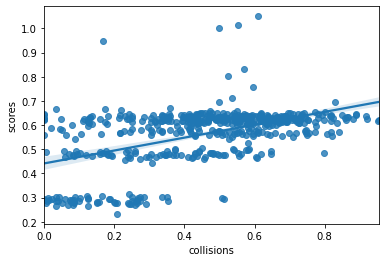

In [ ]:
sns.regplot(y_test,preds2_dnn.scores)

The test collisions minus the predicted collisions gives a distribution of collisions and gives an idea of how accurate the model is at predicting. The azmith of the distribution sits roughtly above zero, and the distribution curve spans out to about +/- 0.6. 

The spread of the curve says the model is consistent with the collision dataset and by the peak of the curve being placed above zero means the model most frequently returns a value similar to the collision target.

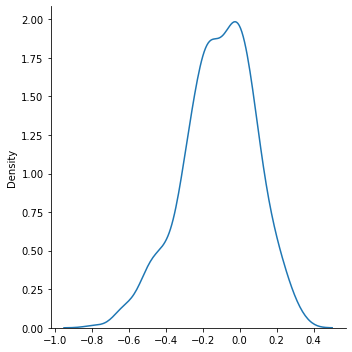

In [ ]:
sns.displot(y_test.reset_index(drop=True) - preds2_dnn.scores, kind='kde')

In [ ]:
#"Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep","Fri","Mon","Sat","Sun","Thu","Tue","Wed","year","temp","wdsp","NUM_TRIPS"
input_dnn = pd.DataFrame.from_dict(data = 
                {
                    'temp' : [61.8, 31.2, 77.0],
                    'slp' : [1023, 1002, 985],
                    'wdsp' : [5.0, 3.0, 8.0],
                    'April' : [0,0,0],
                    'August' : [1,0,0],
                    'December' : [0,1,0],
                    'February' : [0,0,1],
                    'Jananuary' : [0,0,0],
                    'July' : [0,0,0],
                    'June' : [0,0,0],
                    'March' : [0,0,0],
                    'May' : [0,0,0],
                    'November' : [0,0,0],
                    'October' : [0,0,0],
                    'September' : [0,0,0],
                    'Friday' : [0,0,0],
                    'Monday' : [1,1,1],
                    'Saturday' : [0,0,0],
                    'Sunday' : [0,0,0],
                    'Thursday' : [0,0,0],
                    'Tuesday' : [0,0,0],
                    'Wednesday' : [0,0,0],
                })

estimator_dnn = tf.contrib.learn.SKCompat(
    tf.contrib.learn.DNNRegressor(
        model_dir='/tmp/DNN_house_regression_trained_model', 
        hidden_units=[20,18,14], 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(
            input_dnn
          )
      )
  )

preds_dnn = estimator_dnn.predict(x=input_dnn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa0da659208>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_model/mo

Using the value of about 700 collisions to be the absolute worst case scenario possible, the normalized values returns can be multiplied to give a prediction of the suspected number of collisions.

In [ ]:
predslistnorm_dnn = preds_dnn['scores']
predslistcoll_dnn = preds_dnn['scores']*700
prednorm_dnn = format(str(predslistnorm_dnn))
predslistcoll_dnn = format(str(predslistcoll_dnn))
print(prednorm_dnn)
print(predslistcoll_dnn)

[0.5391964 0.5415305 1.1730119]
[377.43747 379.07135 821.10834]


For the , you can see below, we are in August, Monday. Where the temperature is 61.8F, sea level pressure of 1023 millibars, and a windspeed of 5 knots will predicts about 377 collisions. 

In on a Monday in December, with a temparture of 31.2F, sea level pressure of 1002 millibars, and windspeed of 3 knots 379 collisions, and on a Monday in February, where the temperature is 77F, sea level pressure is 985 millibars and windspeed of 8 knots will see 821 collisions. This may be a value in error but it is also unusual to see a temperature of 77F in February, the average temperature in New York in February being about 42F. 

## Conclusion

The linear model is a very simple prediction method that looks for linear relationships between the data and the target and then tries to make a best fitting line to fit all the points. The large errors calculated, around 0.5 - 0.7, show how that the model does not perform well in fitting the data. The issue of its large margin of error is due to its inflexible to more complex data, for instance the oscillating seasonality of weather in annual data. 

The deep-learning neural network (DNN) creates a more accurate model. Instead of a linear relationship it creates a complex equation to calculate the result. For instance when the month is included with the data and the DNN recognizes seasonality and compensates the weight with the appropriate bias.